In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchsummary import summary

from tqdm import tqdm
from dataloader.CMUpanoptic import CMUDataset, CMUHeatmapDataset, CMUBBoxDataset, CMUHandSegment

from matplotlib import pyplot as plt

import cv2
import numpy as np

imageSize = 224
device = 'cuda' if torch.cuda.is_available() else 'cpu'
datasetFolder = "E:\Dataset\CMU\hand_manual\manual_train"

keypoints = CMUDataset(datasetFolder, imageSize)
heatmap = CMUHeatmapDataset(datasetFolder, imageSize)
bbox = CMUBBoxDataset(datasetFolder, imageSize)
segment = CMUHandSegment(datasetFolder, imageSize)

kpLoader = DataLoader(keypoints, batch_size = 1)
hmLoader = DataLoader(heatmap, batch_size = 1)
bxLoader = DataLoader(bbox, batch_size = 1)
sgLoader = DataLoader(segment, batch_size = 1)

C:\Users\tanas\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
imgs, labels = iter(kpLoader).next()
img = imgs[0].permute(1, 2, 0).numpy()
img = np.ascontiguousarray(img, dtype=np.uint8)

labels  = labels[0]
for i in range(0, len(labels), 2):
    x = labels[i + 0].item()
    y = labels[i + 1].item()
    center = (round(x), round(y))
    img = cv2.circle(img, center, 2, (255, 0, 0), -1)
    
plt.imshow(img)

IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

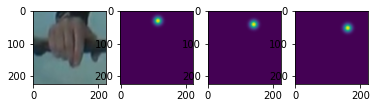

In [3]:
imgs, labels = iter(hmLoader).next()
f, axarr = plt.subplots(1, 4)

axarr[0].imshow(imgs[0].permute(1, 2, 0))
axarr[1].imshow(labels[0][0])
axarr[2].imshow(labels[0][1])
axarr[3].imshow(labels[0][2])

In [4]:
print(f"{torch.sum(labels[0][0]) = }")

torch.sum(labels[0][0]) = tensor(402.0852)


[ 30.  41. 152. 133.]


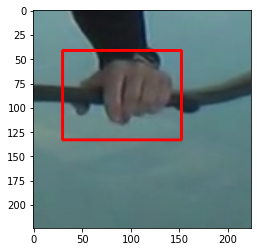

In [5]:
imgs, boxes = iter(bxLoader).next()

img = imgs[0].permute(1, 2, 0).numpy()
img = np.ascontiguousarray(img, dtype=np.uint8)
box = boxes[0].numpy()
p0 = (round(box[0]), round(box[1]))
p1 = (round(box[2]), round(box[3]))

print(box)
img = cv2.rectangle(img, p0, p1, (255, 0, 0), 2)
plt.imshow(img)

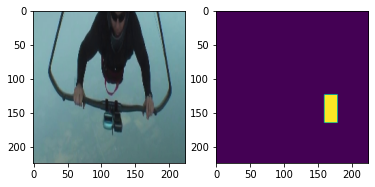

In [6]:

imgs, labels = iter(sgLoader).next()
f, axarr = plt.subplots(1, 2)

img = imgs[0].permute(1, 2, 0)
sg = labels[0]
axarr[0].imshow(img)
axarr[1].imshow(sg)